# Archive of Our Own analysis

[Archive of Our Own](https://archiveofourown.org/) is the internet largest archive of stories, spanning both digital work and fandom content.<br>
This file is to be launched after `ao3 script.py`, and analyses the data scraped by the script.

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('data/ao3.csv')  

In [29]:
data.head(10)

,language,words,chapter_running_count,chapter_total_count,collections,comments,kudos,bookmarks,hits,title,fandom,rating,day,month,year
0,English,57657,12,?,14.0,236.0,1437,538.0,25045,A Villainess's Lawyer - I'll Help You Get The ...,Original Work,General Audiences,28,Jan,2023
1,English,23215,8,8,NaN,59.0,321,45.0,3588,Reapers by Jezmaiya (Im_Chamsae),Kuroko no Basuke | Kuroko's Basketball,Teen And Up Audiences,27,Feb,2021
2,English,5487,3,17,NaN,NaN,14,3.0,156,The Lies that We Love to Whisper by Bobopacca ...,Original Work,Teen And Up Audiences,9,Feb,2021
3,English,12980,6,?,NaN,19.0,144,23.0,1725,Purple Murple by Im_Chamsae,"DCU (Comics), Batman - All Media Types, Young ...",General Audiences,20,Jan,2021
4,English,3176,2,6,NaN,15.0,88,8.0,1163,Of Witches and Magic: A Robin’s Observational ...,"Batman - All Media Types, Batman (Comics), Har...",General Audiences,16,Jan,2021
5,English,1313,1,1,NaN,NaN,147,7.0,954,A Safe Space by Im_Chamsae,"Batman - All Media Types, Batman (Comics)",General Audiences,6,Nov,2020
6,English,1134,1,1,NaN,8.0,150,13.0,1130,It's Only Skin Deep by Im_Chamsae,"DCU (Comics), Batman - All Media Types, Batman...",General Audiences,24,Jul,2020
7,English,2178,1,1,NaN,12.0,189,22.0,1656,Ringers of Faith by Im_Chamsae,"DCU (Comics), Batman - All Media Types, Batman...",General Audiences,24,Jul,2020
8,English,2276,1,1,NaN,9.0,117,8.0,851,One Little Vendetta by Im_Chamsae,"DCU (Comics), Batman - All Media Types, Batman...",General Audiences,23,Jul,2020
9,English,4651,3,3,1.0,13.0,80,6.0,956,Aster by Im_Chamsae,"DCU (Comics), Teen Titans - All Media Types",General Audiences,23,Jul,2020


In [30]:
data["kudos per hit"] = data["kudos"]/data["hits"]

In [31]:
data.sort_values(by=["kudos per hit"], ascending = False).head(3)

,language,words,chapter_running_count,chapter_total_count,collections,comments,kudos,bookmarks,hits,title,fandom,rating,day,month,year,kudos per hit
5,English,1313,1,1,NaN,NaN,147,7.0,954,A Safe Space by Im_Chamsae,"Batman - All Media Types, Batman (Comics)",General Audiences,6,Nov,2020,0.154088
8,English,2276,1,1,NaN,9.0,117,8.0,851,One Little Vendetta by Im_Chamsae,"DCU (Comics), Batman - All Media Types, Batman...",General Audiences,23,Jul,2020,0.137485
6,English,1134,1,1,NaN,8.0,150,13.0,1130,It's Only Skin Deep by Im_Chamsae,"DCU (Comics), Batman - All Media Types, Batman...",General Audiences,24,Jul,2020,0.132743


In [32]:
data_by_year = data.groupby("year", as_index=False)["words", "comments", "kudos", "bookmarks", "hits"].sum()

C:\Users\flbon\AppData\Local\Temp\ipykernel_13080\3921452621.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_year = data.groupby("year", as_index=False)["words", "comments", "kudos", "bookmarks", "hits"].sum()


In [33]:
data_by_year

,year,words,comments,kudos,bookmarks,hits
0,2017,5936,8.0,12,0.0,278
1,2018,4510,0.0,12,1.0,143
2,2019,112137,24.0,222,23.0,5521
3,2020,102297,159.0,2643,253.0,25813
4,2021,44858,93.0,567,79.0,6632
5,2023,57657,236.0,1437,538.0,25045


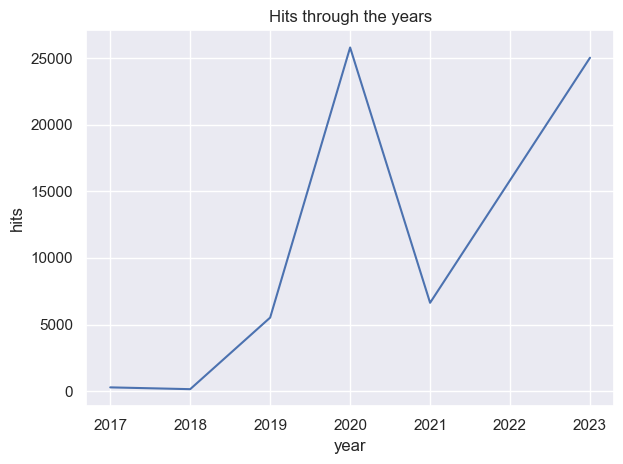

In [34]:
sns.lineplot(x='year', y='hits', data=data_by_year, errorbar=None)
plt.title("Hits through the years")
plt.tight_layout()

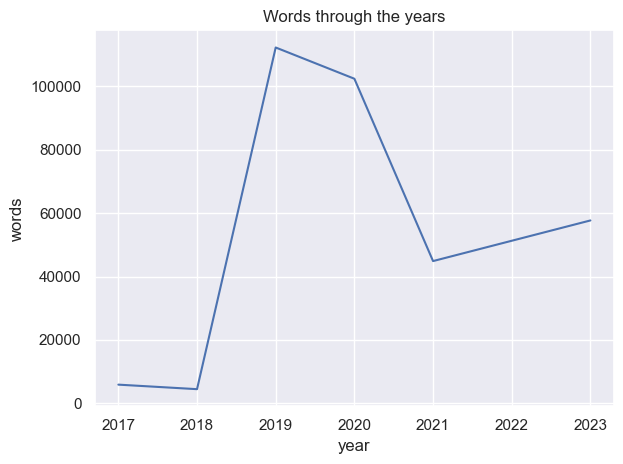

In [35]:
sns.lineplot(x='year', y='words', data=data_by_year, errorbar=None)
plt.title("Words through the years")
plt.tight_layout()

Text(0.5, 1.0, 'Kudos per hit by rating')

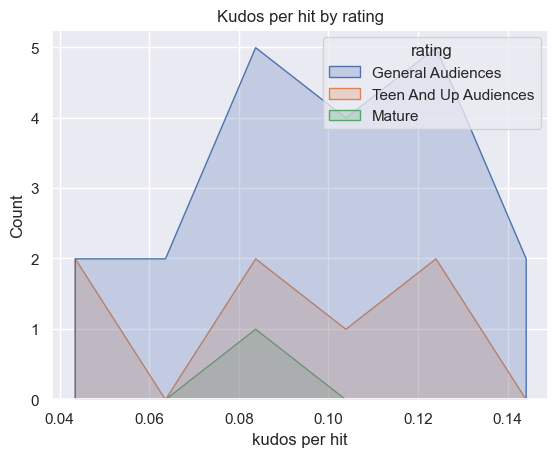

In [36]:
sns.histplot(data=data, x="kudos per hit", hue="rating", element="poly")
plt.title("Kudos per hit by rating")

<AxesSubplot: xlabel='hits', ylabel='kudos'>

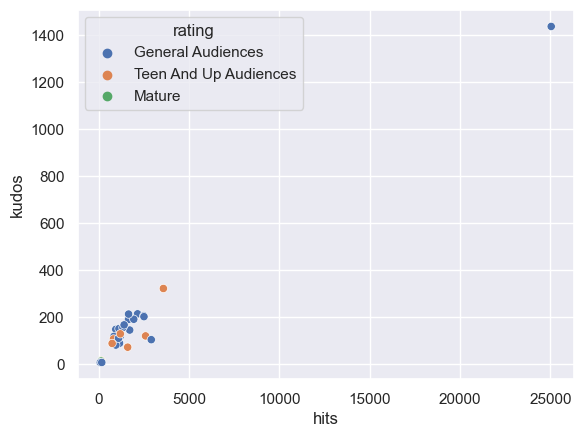

In [37]:
sns.scatterplot(x='hits', y='kudos', hue='rating', data=data)

In [38]:
data['fandom'].nunique()

22

In [39]:
col_list = data.fandom.values.tolist()
print(col_list)

['Original Work  ', "Kuroko no Basuke | Kuroko's Basketball  ", 'Original Work  ', 'DCU (Comics), Batman - All Media Types, Young Justice (Cartoon), Teen Titans (Comics), Starfire (Comics), Batgirl (Comics)  ', 'Batman - All Media Types, Batman (Comics), Harry Potter - J. K. Rowling  ', 'Batman - All Media Types, Batman (Comics)  ', 'DCU (Comics), Batman - All Media Types, Batman (Comics)  ', 'DCU (Comics), Batman - All Media Types, Batman (Comics), Red Hood and the Outlaws (Comics), Nightwing (Comics)  ', 'DCU (Comics), Batman - All Media Types, Batman (Comics), Batgirl (Comics)  ', 'DCU (Comics), Teen Titans - All Media Types  ', 'Supernatural, DCU (Comics), Batman - All Media Types, Batman (Comics)  ', 'DCU (Comics), Teen Titans - All Media Types, Teen Titans (Comics), Super Sons (Comics)  ', 'DCU (Comics), Batman - All Media Types, Batman (Comics), Red Robin (Comics), Harry Potter - J. K. Rowling  ', 'DCU (Comics), Batman - All Media Types, Batman (Comics), Harry Potter - J. K. Row

In [40]:
fandom_data = data.groupby("fandom")
fandom_data.sum().sort_values("hits", ascending=False)

five_fandoms = fandom_data["hits", "words", "kudos"].sum().sort_values("hits", ascending=False).head(6)


C:\Users\flbon\AppData\Local\Temp\ipykernel_13080\1585466098.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fandom_data.sum().sort_values("hits", ascending=False)
C:\Users\flbon\AppData\Local\Temp\ipykernel_13080\1585466098.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  five_fandoms = fandom_data["hits", "words", "kudos"].sum().sort_values("hits", ascending=False).head(6)


In [41]:
five_fandoms = five_fandoms.reset_index(drop=False)

In [42]:
five_fandoms.dtypes

fandom    object
hits       int64
words      int64
kudos      int64
dtype: object

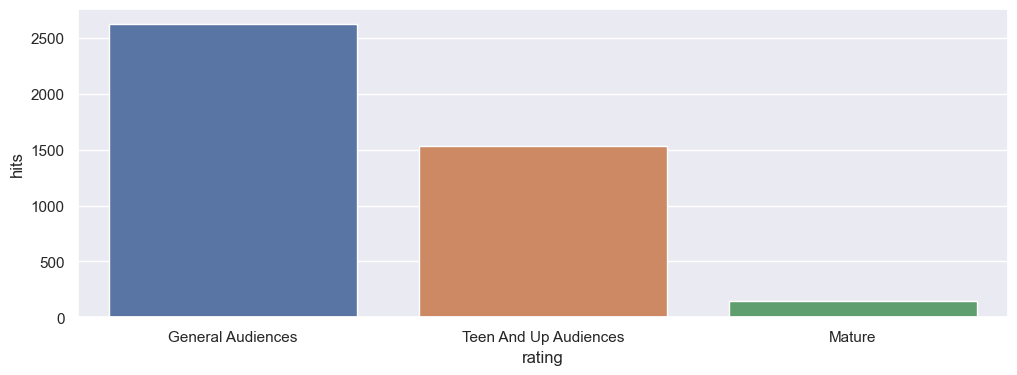

In [43]:
plt.figure(figsize=(12,4))
sns.barplot(x="rating", y="hits", data=data, errorbar=None)
plt.show()

In [44]:
data['rating'].value_counts()

General Audiences        20
Teen And Up Audiences     7
Mature                    1
Name: rating, dtype: int64